In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv("../../../Alpha-Quant-Course/Data/FixTimeBars/AUDUSD_4H_Admiral_READY.csv", parse_dates=True, index_col="time")

In [3]:
def moving_parkinson_estimator(df, window_size=30):
    """
    Calculate Parkinson's volatility estimator based on high and low prices.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing 'high' and 'low' columns for each trading period.

    Returns:
    --------
    volatility : float
        Estimated volatility based on Parkinson's method.
    """
    def parkinson_estimator(df):
        N = len(df)
        sum_squared = np.sum(np.log(df['high'] / df['low']) ** 2)

        volatility = math.sqrt((1 / (4 * N * math.log(2))) * sum_squared)
        return volatility
    
    df_copy = df.copy()
    # Create an empty series to store mobile volatility
    rolling_volatility = pd.Series(dtype='float64')

    # Browse the DataFrame by window size `window_size` and apply `parkinson_estimator`.
    for i in range(window_size, len(df)):
        window = df_copy.loc[df_copy.index[i-window_size]: df_copy.index[i]]
        volatility = parkinson_estimator(window)
        rolling_volatility.at[df_copy.index[i]] = volatility

    # Add the mobile volatility series to the original DataFrame
    df_copy['rolling_volatility_parkinson'] = rolling_volatility
    
    return df_copy

In [4]:
df = moving_parkinson_estimator(df)

<AxesSubplot:xlabel='time'>

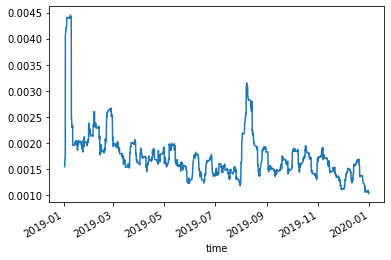

In [5]:
df['rolling_volatility_parkinson'].loc["2019"].plot()

In [6]:
df[["close", "tick_volume", "rolling_volatility_parkinson"]].corr()

,close,tick_volume,rolling_volatility_parkinson
close,1.000000,0.145435,-0.348118
tick_volume,0.145435,1.000000,0.296334
rolling_volatility_parkinson,-0.348118,0.296334,1.000000
